<h1 style="color:blue; text-align:center"> ISAT341- Machine Learning and Data Science </h1>

<h2 style="color:Green; text-align:center; font-family:ComicSans"> Project: Machine Learning Confidential Sensor Data </h2>

<img src="images/machine_learning.jpg" width=200; height=200>


<h2 style="color:Green; text-align:center; font-family:ComicSans"> Working with real-world datasets</h2>

# Objectives
To demonstrate the ability to complete an end-to-end data science / machine learning project using real-world data by following and implementing the main machine learning checklist steps that lead to a solution, namely:

* Frame the problem and look at the big picture.
* Get the data.
* Explore the data to gain insights.
* Prepare the data to expose the underlying data patterns to Machine Learning algorithms.
* Explore many different models and short-list the best ones.
* Fine-tune your models and combine them into a great solution.
* Present your solution.
* Launch, monitor, and maintain your system


## Frame the Problem

<img src="images/sensor_array.jpg" width=300; height=300>

### Sensor Data

The data source as well as the exact nature of the data is confidential. Each data instance contains 12 real-valued input attributes. Each input
attribute represents a sensor designed to detect the presence of one of two groups of substances. As an alternative, the sensor readings may
represent a 'false alarm'.

* Substance 1 is represented by the value 'one' in the class attribute column.
* Substance 2 is represented by the value 'two' in the class attribute column.
* A false alarm is represented by the value 'three' in the class attribute column.

The problem is framed as a **supervised learning** problem: Predict the class of a substance from sensor data using the given measurements in
the dataset.


In [1]:
# import packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)

## Exploratory Data Analysis

### TO DO: Use Pandas to load your data into a dataframe

In [2]:
# Display the first ten rows after you load the data.
df = pd.read_csv("data/Sensor_Data_Confidential_341Project_DataSet5.csv")

df.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,class
0,1.473,2.311,3.179,2.666,0.2795,0.2771,0.22340,0.1855,0.2539,1.138,1.111,4.712,one
1,1.460,2.377,3.214,2.920,0.2527,0.3064,0.02563,0.1965,0.3027,1.213,1.027,5.463,one
2,1.552,2.164,3.064,2.745,0.2820,0.2100,0.17210,0.1929,0.2100,1.221,1.058,5.332,one
3,1.605,2.228,3.149,2.834,0.2917,0.3613,0.20870,0.1294,0.2734,1.144,1.062,4.829,one
4,1.534,2.114,3.309,2.976,0.2100,0.2502,0.22580,0.1770,0.2039,1.254,1.112,5.734,one


### TO DO: Use the dataframe describe method dataframe.describe() to display some summary statistics

In [3]:
df.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12
count,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000
mean,-102.944836,-109.711795,-111.319884,-67.994856,-124.949039,-105.066162,-81.658039,-125.587986,-100.835192,-74.740051,-85.312925,-78.599944
std,1027.427211,1050.057089,1072.729741,849.911071,1115.540299,1027.206775,903.995215,1115.467928,1003.772889,877.403031,930.088695,904.281076
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,3.058500,0.817600,4.848250,3.998250,0.462600,0.649400,0.308800,0.188000,0.423600,1.379000,1.089000,0.789800
50%,4.082000,1.353000,5.336000,5.041000,0.806300,1.634500,0.565200,0.302700,0.694600,1.996000,1.285500,4.915000
75%,4.504000,2.354250,5.591250,5.642750,1.400750,2.159000,0.959800,0.491900,1.234250,4.974000,1.865250,5.403000
max,5.105000,4.675000,5.944000,6.013000,2.754000,3.638000,2.446000,1.199000,2.561000,5.312000,5.640000,20.000000


## Data Cleansing

### TO DO: Display the shape of your dataframe data in the cell below

In [4]:
df.shape

(2064, 13)

### TO DO: Use Pandas dataframe to find bad or missing data.

In [5]:
#Enter your code in the cell below to implement the drop, replace and display.
df = df.replace(-9999.0, np.nan)
df = df.dropna()
df.head(10)

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,class
0,1.473,2.311,3.179,2.666,0.27950,0.27710,0.22340,0.18550,0.2539,1.138,1.1110,4.712,one
1,1.460,2.377,3.214,2.920,0.25270,0.30640,0.02563,0.19650,0.3027,1.213,1.0270,5.463,one
2,1.552,2.164,3.064,2.745,0.28200,0.21000,0.17210,0.19290,0.2100,1.221,1.0580,5.332,one
3,1.605,2.228,3.149,2.834,0.29170,0.36130,0.20870,0.12940,0.2734,1.144,1.0620,4.829,one
4,1.534,2.114,3.309,2.976,0.21000,0.25020,0.22580,0.17700,0.2039,1.254,1.1120,5.734,one
6,1.566,2.323,3.469,2.711,0.24170,0.05371,0.21120,-0.02686,0.2197,1.158,0.9924,4.780,one
7,1.425,2.152,3.287,2.781,0.29910,0.20750,0.10380,0.11470,0.2698,1.271,1.1150,5.662,one
8,1.595,2.271,3.323,2.743,0.17330,0.19650,0.16850,0.05859,0.2051,1.290,1.0330,5.145,one
9,1.628,2.211,3.176,2.710,0.08423,0.18920,0.27830,0.16850,0.3491,1.155,1.0080,5.613,one
10,1.583,2.253,3.278,2.854,0.14890,0.10990,0.22830,0.07324,0.2173,1.135,1.1120,5.549,one


In [6]:
# shape of data in dataframe after cleansing
df.shape

(1826, 13)

### TO DO: Use pandas correlation method to find the two features (inputs) with the highest correlation

In [7]:
#Enter your answers in the cell immediately following the output correlation table
corrs = abs(df.corr(numeric_only=True))
print(corrs)
print()
print("Inputs 9 and 5 are the most correlated with a correlation of 0.97259")

           Input 1   Input 2   Input 3   Input 4   Input 5   Input 6  \
Input 1   1.000000  0.527248  0.932390  0.938750  0.748763  0.900299   
Input 2   0.527248  1.000000  0.463356  0.505046  0.416400  0.614186   
Input 3   0.932390  0.463356  1.000000  0.884079  0.643788  0.813403   
Input 4   0.938750  0.505046  0.884079  1.000000  0.812194  0.877337   
Input 5   0.748763  0.416400  0.643788  0.812194  1.000000  0.834460   
Input 6   0.900299  0.614186  0.813403  0.877337  0.834460  1.000000   
Input 7   0.701600  0.426394  0.596152  0.734622  0.905794  0.772869   
Input 8   0.675776  0.437816  0.574708  0.727402  0.901688  0.764765   
Input 9   0.722770  0.435743  0.630974  0.802189  0.972590  0.825776   
Input 10  0.692099  0.449897  0.605835  0.764233  0.885527  0.827059   
Input 11  0.464854  0.352147  0.403812  0.537204  0.742445  0.657962   
Input 12  0.160311  0.091390  0.160420  0.159417  0.183917  0.181238   

           Input 7   Input 8   Input 9  Input 10  Input 11  Inp

## Data Visualization

### TO DO: Plot bar charts using pandas dataframe (plot the mean value of the sensors)

The mean values are: 
Input 1     3.680058
Input 2     1.727913
Input 3     5.009482
Input 4     4.709107
Input 5     1.015576
Input 6     1.525255
Input 7     0.700818
Input 8     0.372550
Input 9     0.904062
Input 10    2.779109
Input 11    1.886693
Input 12    3.772419
dtype: float64


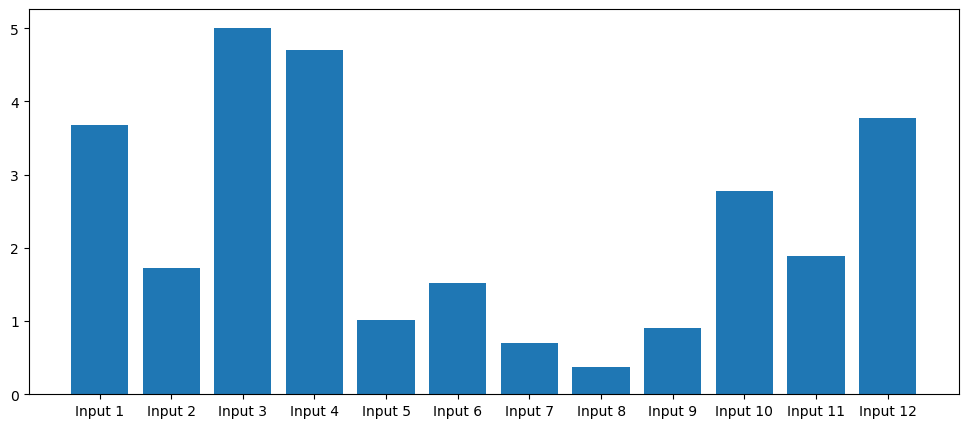

In [8]:
columns = df.columns.tolist()

features = len(columns)-1
columns = columns[:features]

print('The mean values are: \n{}'.format(df.mean(numeric_only=True)))

mean_values = df[:].mean(numeric_only=True)

plt.figure(figsize=(12, 5))
plt.bar(columns, mean_values)
plt.show()

## Data Preprocessing

### TO DO: Create Feature Matrix and Target Vector

In [9]:
# "Features" are also known as predictors, inputs, or attributes. The "response" is also known as the target, label, or output.
X  =df.drop(columns=['class'])
y = df['class']

print(X)
print(y)

      Input 1  Input 2  Input 3  Input 4  Input 5  Input 6  Input 7  Input 8  \
0       1.473    2.311    3.179    2.666   0.2795   0.2771  0.22340  0.18550   
1       1.460    2.377    3.214    2.920   0.2527   0.3064  0.02563  0.19650   
2       1.552    2.164    3.064    2.745   0.2820   0.2100  0.17210  0.19290   
3       1.605    2.228    3.149    2.834   0.2917   0.3613  0.20870  0.12940   
4       1.534    2.114    3.309    2.976   0.2100   0.2502  0.22580  0.17700   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2059    3.682    1.301    4.939    4.453   0.4895   0.7922  0.23190  0.05005   
2060    3.412    1.293    4.949    4.199   0.4578   0.9521  0.21360  0.23070   
2061    3.640    1.284    5.111    4.460   0.5786   0.8020  0.26980  0.31740   
2062    3.746    1.261    5.049    4.885   0.5835   1.1470  0.32350  0.23070   
2063    3.959    1.108    5.422    4.835   0.5579   1.3230  0.51510  0.21000   

      Input 9  Input 10  Input 11  Inpu

### TO DO: Convert the features dataframe to a numpy array

In [10]:
X.to_numpy()

array([[1.473, 2.311, 3.179, ..., 1.138, 1.111, 4.712],
       [1.46 , 2.377, 3.214, ..., 1.213, 1.027, 5.463],
       [1.552, 2.164, 3.064, ..., 1.221, 1.058, 5.332],
       ...,
       [3.64 , 1.284, 5.111, ..., 1.46 , 1.118, 4.867],
       [3.746, 1.261, 5.049, ..., 1.482, 1.128, 5.627],
       [3.959, 1.108, 5.422, ..., 1.595, 1.244, 5.623]])

### TO DO: Label Encoding

In [11]:
# Transform the categorical labels into integers using the scikit-learn label encoder
from sklearn.preprocessing import LabelEncoder

#Instanciate integer encoder
label_encoder = LabelEncoder()

#encode the class labels 
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)

#print the categorical class labels we encoded (note the underscore!)
print('The categorical classes are {}\n'.format(label_encoder.classes_))

#print a few encoded values using python slice
print('500 sample encoded values:')
print(y_encoded[slice(500)])

#print the shape of the ecoded classes
print('\nencoded shape:', y_encoded.shape)

The categorical classes are ['one' 'three' 'two']

500 sample encoded values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2

### TO DO: Split the data into Training and Testing Sets

In [41]:
from sklearn.model_selection import train_test_split

#Use a 80% / 20% train/test split for this project.
#NOTE: You must use the encoded class labels in this part

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=.20, random_state=0)

### TO DO:Look at the shape of the data (rows and columns) after splitting it into training and testing sets

In [42]:
# Train

print('The shape of X_train: {}'.format(X_train.shape))
print('The shape of y_train: {}'.format(y_train.shape))

The shape of X_train: (1460, 12)
The shape of y_train: (1460,)


In [43]:
# Test
print('The shape of X_test: {}'.format(X_test.shape))
print('The shape of y_test: {}'.format(y_test.shape))

The shape of X_test: (366, 12)
The shape of y_test: (366,)


## Scale The Data

### TO DO: Let's use the StandarScaler from Scikit-learn to transform (scale) our feature

In [44]:
# Standardizing the Features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# from this point forward you must use the scaled training and testing data

## Model Building

Algorithms being used: 
1. K-Nearest Neighbor (with K=10, K=50, K=200)
2. Logistic Regression
3. Linear Support Vector Classifier


## Build a KNN Classification Model for K = 10, 50 and 200

### TO DO: In the sections below you should build and train the actual machine learning model.

In [48]:
# In the cell below: enter the code to import, instantiate, fit, 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#predict and test the model's performance (accuracy) for the K-Nearest Neighbor Model in SciKit-Learn for K= 10, 50 and 200. 
#!!! This should be completed in ONE cell using a loop, etc. !!!!

knn_loop = {10,50,200}

for i in knn_loop:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std,y_train)
    y_pred = knn.predict(X_test_std)
    print('KNN: {}'.format(i))
    print('Test accuracy: {0:0.2f}\n'.format(knn.score(X_test_std,y_test)))
    




KNN: 200
Test accuracy: 0.86

KNN: 10
Test accuracy: 0.98

KNN: 50
Test accuracy: 0.96



### Predicting class-membership probabilities

In [49]:
knn.predict_proba(X_test_std[:3, :])

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

### TO DO:class-membership probability index = 10 

In [73]:
#Predict the class membership probability by using the a row with index = 10 from the X_test_std data. 

#Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test

for i in knn_loop:
    index = 10
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std,y_train)
    print('KNN: {}'.format(i))
    print('There is a {}% chance that X_test {}  belongs to class 0'.format(knn.predict_proba(X_test_std)[index][0]*100,index))
    print('There is a {}% chance that X_test {}  belongs to class 1'.format(knn.predict_proba(X_test_std)[index][1]*100,index))
    print('There is a {}% chance that X_test {}  belongs to class 2'.format(knn.predict_proba(X_test_std)[index][2]*100,index))
    print()
print('True Value: {}'.format(y_test[index]))
    
    

KNN: 200
There is a 18.0% chance that X_test 10  belongs to class 0
There is a 0.0% chance that X_test 10  belongs to class 1
There is a 82.0% chance that X_test 10  belongs to class 2

KNN: 10
There is a 0.0% chance that X_test 10  belongs to class 0
There is a 0.0% chance that X_test 10  belongs to class 1
There is a 100.0% chance that X_test 10  belongs to class 2

KNN: 50
There is a 0.0% chance that X_test 10  belongs to class 0
There is a 0.0% chance that X_test 10  belongs to class 1
There is a 100.0% chance that X_test 10  belongs to class 2

True Value: 2


### TO DO:class-membership probability index = 125

In [74]:
# Same steps as above
for i in knn_loop:
    index = 125
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std,y_train)
    print('KNN: {}'.format(i))
    print('There is a {}% chance that X_test {}  belongs to class 0'.format(knn.predict_proba(X_test_std)[index][0]*100,index))
    print('There is a {}% chance that X_test {}  belongs to class 1'.format(knn.predict_proba(X_test_std)[index][1]*100,index))
    print('There is a {}% chance that X_test {}  belongs to class 2'.format(knn.predict_proba(X_test_std)[index][2]*100,index))
    print()
print('True Value: {}'.format(y_test[index]))
    

KNN: 200
There is a 3.0% chance that X_test 125  belongs to class 0
There is a 0.0% chance that X_test 125  belongs to class 1
There is a 97.0% chance that X_test 125  belongs to class 2

KNN: 10
There is a 0.0% chance that X_test 125  belongs to class 0
There is a 0.0% chance that X_test 125  belongs to class 1
There is a 100.0% chance that X_test 125  belongs to class 2

KNN: 50
There is a 0.0% chance that X_test 125  belongs to class 0
There is a 0.0% chance that X_test 125  belongs to class 1
There is a 100.0% chance that X_test 125  belongs to class 2

True Value: 2


### TO DO:class-membership probability index = 200

In [75]:
# Same steps as above
for i in knn_loop:
    index = 200
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std,y_train)
    print('KNN: {}'.format(i))
    print('There is a {}% chance that X_test {}  belongs to class 0'.format(knn.predict_proba(X_test_std)[index][0]*100,index))
    print('There is a {}% chance that X_test {}  belongs to class 1'.format(knn.predict_proba(X_test_std)[index][1]*100,index))
    print('There is a {}% chance that X_test {}  belongs to class 2'.format(knn.predict_proba(X_test_std)[index][2]*100,index))
    print()
print('True Value: {}'.format(y_test[index]))
    

KNN: 200
There is a 98.0% chance that X_test 200  belongs to class 0
There is a 0.0% chance that X_test 200  belongs to class 1
There is a 2.0% chance that X_test 200  belongs to class 2

KNN: 10
There is a 100.0% chance that X_test 200  belongs to class 0
There is a 0.0% chance that X_test 200  belongs to class 1
There is a 0.0% chance that X_test 200  belongs to class 2

KNN: 50
There is a 100.0% chance that X_test 200  belongs to class 0
There is a 0.0% chance that X_test 200  belongs to class 1
There is a 0.0% chance that X_test 200  belongs to class 2

True Value: 0


## Build Logistic Regression Model

### TO DO: scikit-learn Logistic Regression for this lab

In [21]:
# Import and instantiate the Logistic Regression Model in SciKit-Learn is in the cell below

### TO DO: Train the model by calling the model's fit function

In [22]:
# Fit your dataset

### TO DO: Evaluate the Logistic Regression Model

In [23]:
# create the model's predictions. Name the prediction vector y_pred

### TO DO: Evaluate the Logistic Regression Model's Performance

In [24]:
# Use SciKit Learn's built-in scoring method to evaluate the model's performance accuracy

## Predicting class-membership probabilities using the Logistic Regression Model

### TO DO:class-membership probability index = 10

In [25]:
#Predict the class membership probability by using the a row with index = 10 from the X_test_std data. 

#Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.


### TO DO:class-membership probability index = 130

In [26]:
# Same steps as above

### TO DO:class-membership probability index = 200

In [27]:
# Same Steps as above

## Build Linear Support Vector Classifier Model

### TO DO:scikit-learn Linear Support Vector Classifier for this lab

In [28]:
# Import and instantiate the Linear Support Vector Classifier Model in SciKit-Learn

### TO DO: Train the model by calling the model's fit function

In [29]:
# Fit your dataset

### TO DO: Evaluate the Linear Suport Vector Classifier Model

In [30]:
# create the model's predictions. Name the prediction vector y_pred

### TO DO: Evaluate the Linear Suport Vector Model's Performance

In [31]:
# Use SciKit Learn's built-in scoring method to evaluate the model's performance accuracy.

### TO DO: Using the Predict Method of the Linear Suport Vector Model

In [32]:
# Use SciKit Learn's built-in predict method to test the model's predictive performance for the first row of data in X_test_std

### TO DO:Print the number of misclassifications using numpy

In [33]:
#

## Confusion Matrix

### TO DO: Compute the Confusion Matrix for the Linear Suport Vector Model

In [34]:
# Use SciKit Learn's metrics module to compute the model's confusion matrix

### TO DO: Classification Correctness

In [35]:
# Based on the output of your confusion matrix, what was the total number of correct classifications of Substance 2?

# Enter your answer as markdown in the cell below:

### TO DO: Compute the Classification report for Linear Suport Vector Model

In [36]:
# Use SciKit Learn's metrics module to compute the model's classification report.

### TO DO: Classification Report

Based on the output of your classification report, out of all the times Substance 1 should have been predicted, what percentage of times was
it correctly predicted?

Which performance score did you use to evaluate the performance of the model(s) from the confusion matrix /classification report? (HINT: You
may need to research the meaning and difference between precision, recall and f1-score)

Enter your answer as markdown in the cell below

## Serialization
___

### TO DO: Model Persistence - Save/Load the trained classifier

To receive full credit for this part you must test the saved and re-loaded classifiers on an instance of “unknown” data and show that it correctly
classifies the instance. It’s ok if you use an instance (sample) that is from the test set as the “unknown” data.

**NOTE: Use either the Logistic Regression Model or the K-Nearest Neighbors Classifier for this part**

### Step 1: Save the Model

In [37]:
# Pickle (serialize) and save the trained classifier to a folder

### Step 2: Load the saved model

In [38]:
# Load the saved the trained classifier into memory

### Step 3: Test the re-loaded model

In [39]:
# Use SciKit Learn's built-in predict method to test the re-loaded model on data from the row of data in X_test_std with index equal to six (6)

Give a brief (¼ page) report (in the markdown cell below ) of your analysis detailing your understanding of the analysis, the machine learning
models and their comparative performance, statistical insights, etc. (include reference website links if used)

In [40]:
###

## BONUS (15 pts)